In [3]:
import pandas as pd
links = pd.read_csv('../wikispeedia_paths-and-graph/links.tsv', comment='#', delimiter='\t', 
                                    names=['article', 'linkTarget'])  
links22 = pd.read_csv('../ada-2022-project-deadmaus/Wiki_2022/links22.tsv', comment='#', delimiter='\t', 
                                    names=['article', 'linkTarget'])

In [49]:
print(f"2009 dataset total links: {len(links)} \n2022 dataset total links: {len(links22)}")

2009 dataset total links: 119882 
2022 dataset total links: 227581


In [50]:
# Any missing values?
print("Missing values: ", links.article.isna().sum())
print("Missing values: ", links22.article.isna().sum())
print("Missing values: ", links.linkTarget.isna().sum())
print("Missing values: ", links22.linkTarget.isna().sum())

Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  0


### Number of words in the articles 
We want to examine the number of words in the articles to get a better understandign of the dataset. Additionally we want to know how the number of links correlate with the number of links and what the relationship between number of links and number of words look like. 

In [12]:
from urllib.parse import quote, unquote
from bs4 import BeautifulSoup
# Hermans function
def get_plaintext(name):
    file_path = '../plaintext_articles/' + name + '.txt'
    with open(file_path, encoding='utf-8') as file:
        #first 5 lines are comments and titles 
        lines = file.readlines()[5:] 
        return list(map(str.strip, lines))

In [13]:
# Count the number of words in each article
ls_articles09 = links.article.unique()
ls_articles22 = links22.article.unique()

word_count_ls = []

for article in ls_articles09:
    word_count= sum([len(l.split()) for l in get_plaintext(article)])
    word_count_ls.append(word_count)

Longest article: 16348 words 
Shortest article: 100 words 
Median length: 2653.0


Text(0, 0.5, 'Frequency')

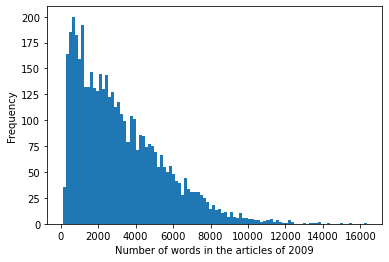

In [44]:
# Plot histogram over number of words per article
import matplotlib.pyplot as plt

print(f"Longest article: {max(word_count_ls)} words \nShortest article: {min(word_count_ls)} words \nMedian length: {np.median(word_count_ls)}")

plt.hist(word_count_ls, bins=100)
plt.xlabel("Number of words in the articles of 2009")
plt.ylabel("Frequency")

In [51]:
# Words over number of links. The articles are ordered the same in the word_count_ls as in links dataframe
word_count_na = np.array(word_count_ls)
links_of_articles = [item for sublist in links.groupby(links.article).count().values for item in sublist]
words_over_links = word_count_na/links_of_articles

Max word/link ratio: 3605.0


Text(0.5, 0, 'Words over links per article')

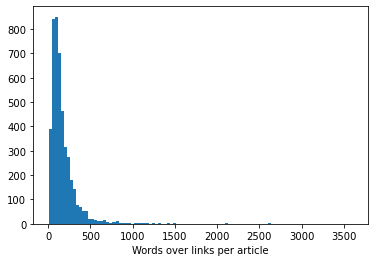

In [52]:
print(f"Max word/link ratio: {max(words_over_links)}")
plt.hist(words_over_links, bins=100)
plt.xlabel("Words over links per article")

### Correlations
We need to create lists with counts of each article for both columns in the dataset using the below methodology seperatly. This is because there are more unique articles in the article column than in the linkTarget column. Therefore, in a case where an article which exist in the article column does not exist in the linkTarget column, we append a 0.

In [26]:
# incomming vs outgoing 2009
unique_articles = links.article.unique()
unique_target = links.linkTarget.unique()
outgoing = []
incomming = []

for article in unique_articles:
    outgoing.append(links.article.value_counts()[article])

for article in unique_articles:
    if article in unique_target:
        incomming.append(links.linkTarget.value_counts()[article])
    else:
        incomming.append(0)

4587
4587


In [46]:
# incomming vs outgoing 2022
unique_articles22 = links22.article.unique()
unique_target22 = links22.linkTarget.unique()
outgoing22 = []
incomming22 = []

for article in unique_articles22:
    outgoing22.append(links22.article.value_counts()[article])

for article in unique_articles22:
    if article in unique_target22:
        incomming22.append(links22.linkTarget.value_counts()[article])
    else:
        incomming22.append(0)

4594
4594


In [48]:
# Word Count vs Number of links per article
print(f"2009 Correlation 'word count', 'words over links': {round(np.corrcoef(words_over_links, word_count_ls)[0,1],1)}")

# Incomming vs outgoing 2009
print(f"2009 Correlation 'outgoing links', 'incomming links': {round(np.corrcoef(outgoing, incomming)[0,1], 3)}")

# Incomming vs outgoing 2022 
print(f"2022 Correlation 'outgoing links', 'incomming links': {round(np.corrcoef(outgoing22, incomming22)[0,1], 3)}")

2009 Correlation 'word count', 'words over links': 0.2
2009 Correlation 'outgoing links', 'incomming links': 0.542
2022 Correlation 'outgoing links', 'incomming links': 0.717


Interesting observation: correlation between incomming and outgoing links for each article got stronger between 2009 and 2022. 